In [2]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Import data and simple cleaning
data = pd.read_csv('class_survey.csv')
data = data.iloc[: , 1:]
unique_groups = data.iloc[:, 0].unique()

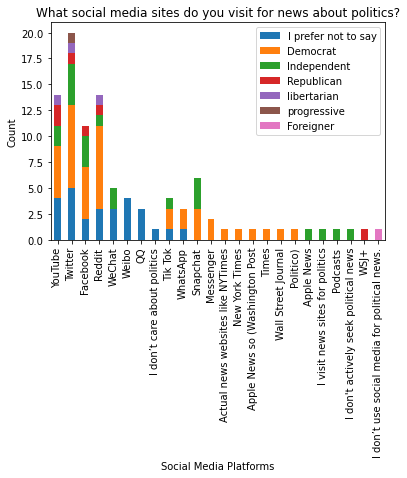

In [6]:
# What social media sites do you visit for news about politics?

def plot_social_media_plat(unique_groups, data, stacked=True):
    agg_data = {}
    for g in unique_groups:
        group_data = data.loc[data['Do you identify as a Democrat, Republican, Independent, or other?'] == g]
        social_media_sites = {}
        for index, row in group_data.iterrows():
            ind_soc_media = row[1].split(', ')
            for s in ind_soc_media:
                if s not in social_media_sites.keys():
                    social_media_sites[s] = 1
                else:
                    social_media_sites[s] += 1

        agg_data[g] = social_media_sites
        if not stacked:
            print(g)
            labels = list(social_media_sites.keys())
            values = list(social_media_sites.values())
            y_pos = range(len(labels))
            plt.bar(y_pos, values)
            plt.xticks(y_pos, labels, rotation=90)
            plt.show()
    if stacked:
        agg_data_dic = pd.DataFrame(agg_data)
        agg_data_dic.plot(kind='bar', stacked=True)
        plt.ylabel('Count')
        plt.xlabel('Social Media Platforms')
        plt.title('What social media sites do you visit for news about politics?')
        plt.show()

plot_social_media_plat(unique_groups, data)

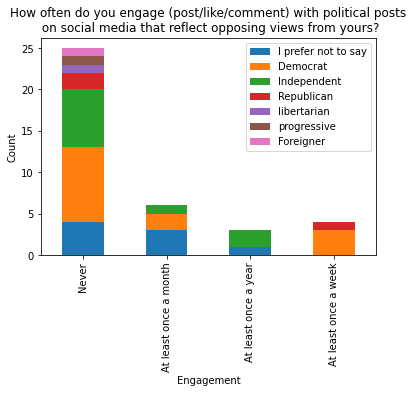

In [10]:
# How often do you engage (post/like/comment) with political posts on social media that reflect your views? -> 1
# How often do you engage (post/like/comment) with political posts on social media that
#     reflect opposing views from yours? -> 0

def plot_engage_views(view, unique_groups, data, stacked=True):
    agg_data = {}
    for g in unique_groups:
        group_data = data.loc[data['Do you identify as a Democrat, Republican, Independent, or other?'] == g]
        group_answers = {}
        if view == 1:
            title = 'How often do you engage (post/like/comment) with political posts\n on social media that reflect your views?'
            answer_col = group_data.iloc[:, 2]
        else:
            title = 'How often do you engage (post/like/comment) with political posts\n on social media that reflect opposing views from yours?'
            answer_col = group_data.iloc[:, 3]
        for a in answer_col:
            if a not in group_answers.keys():
                group_answers[a] = 1
            else:
                group_answers[a] += 1
        agg_data[g] = group_answers
        if not stacked:
            print(g)
            labels = list(group_answers.keys())
            values = list(group_answers.values())
            y_pos = range(len(labels))
            plt.bar(y_pos, values)
            plt.xticks(y_pos, labels, rotation=90)
            plt.show()
    if stacked:
        agg_data_dic = pd.DataFrame(agg_data)
        agg_data_dic.plot(kind='bar', stacked=True)
        plt.ylabel('Count')
        plt.xlabel('Engagement')
        plt.title(title)
        plt.show()
        
plot_engage_views(0, unique_groups, data, True)

In [50]:
# How likely are you to trust a political social media post which goes against your current beliefs? (5)
# How likely are you to trust a political social media post which validates your existing beliefs? (6)
# To what extent do you feel your social media feeds are political echo chambers? (7)
# Have you experienced a shift in your political views based on political social media posts? (8)

def num_scale_analysis(unique_groups, data):
    for g in unique_groups:
        group_data = data.loc[data['Do you identify as a Democrat, Republican, Independent, or other?'] == g]
        print(g)
        print('-----------------------')
        answers = group_data.iloc[:, 4:]
        print(answers.describe())
        print()
        
num_scale_analysis(unique_groups, data)

I prefer not to say
-----------------------
       How likely are you to trust a political social media post which goes against your current beliefs?  \
count                                            8.00000                                                    
mean                                             2.87500                                                    
std                                              0.64087                                                    
min                                              2.00000                                                    
25%                                              2.75000                                                    
50%                                              3.00000                                                    
75%                                              3.00000                                                    
max                                              4.00000                            